In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/thesis/2017 2020 multiva mix.csv')
 

In [ ]:
train_dates=df['date1']

In [ ]:
cols = list(df)[1:4]

print(cols)

['load', 'humidity', 'temp']


In [ ]:
df_for_training = df[cols].astype(float)


In [ ]:
df_for_training.describe()


,load,humidity,temp
count,7201.000000,7201.000000,7201.000000
mean,6963.101236,78.206221,284.247745
std,1169.803600,15.930015,7.123872
min,0.000000,12.000000,263.410000
25%,6187.000000,68.000000,279.460000
50%,6868.000000,81.000000,284.600000
75%,7639.000000,93.000000,289.170000
max,11541.000000,100.000000,302.510000


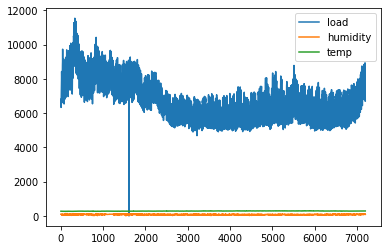

In [ ]:
df_for_plot=df_for_training
df_for_plot.plot.line()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


In [ ]:
trainX = []
trainY = []

n_future = 1   
n_past = 24  


for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (7177, 24, 3).
trainY shape == (7177, 1).


In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY, epochs=176, batch_size=16, validation_split=0.2, verbose=2)


Epoch 1/176
359/359 - 6s - loss: 0.1861 - val_loss: 0.0741 - 6s/epoch - 16ms/step
Epoch 2/176
359/359 - 4s - loss: 0.0804 - val_loss: 0.0482 - 4s/epoch - 12ms/step
Epoch 3/176
359/359 - 4s - loss: 0.0595 - val_loss: 0.0202 - 4s/epoch - 11ms/step
Epoch 4/176
359/359 - 4s - loss: 0.0480 - val_loss: 0.0174 - 4s/epoch - 12ms/step
Epoch 5/176
359/359 - 4s - loss: 0.0417 - val_loss: 0.0160 - 4s/epoch - 12ms/step
Epoch 6/176
359/359 - 4s - loss: 0.0409 - val_loss: 0.0206 - 4s/epoch - 12ms/step
Epoch 7/176
359/359 - 4s - loss: 0.0354 - val_loss: 0.0164 - 4s/epoch - 12ms/step
Epoch 8/176
359/359 - 4s - loss: 0.0354 - val_loss: 0.0117 - 4s/epoch - 12ms/step
Epoch 9/176
359/359 - 4s - loss: 0.0334 - val_loss: 0.0134 - 4s/epoch - 12ms/step
Epoch 10/176
359/359 - 4s - loss: 0.0336 - val_loss: 0.0100 - 4s/epoch - 12ms/step
Epoch 11/176
359/359 - 4s - loss: 0.0315 - val_loss: 0.0109 - 4s/epoch - 12ms/step
Epoch 12/176
359/359 - 4s - loss: 0.0304 - val_loss: 0.0092 - 4s/epoch - 12ms/step
Epoch 13/176


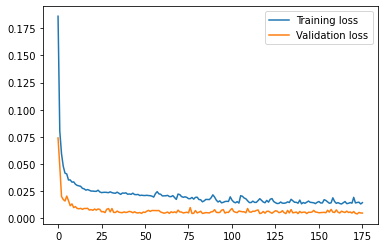

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [ ]:
import math

In [14]:
n_hrs_for_prediction=24  

predict_period_dates = pd.date_range(list(train_dates)[-1], periods=n_hrs_for_prediction, freq='1d').tolist()


In [ ]:
prediction = model.predict(trainX[-n_hrs_for_prediction:])

In [ ]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

y_pred_future.shape

(24,)

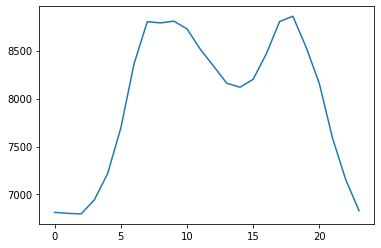

In [ ]:
plt.plot(y_pred_future)

In [ ]:
print(y_pred_future)

[6813.431  6803.198  6797.3467 6944.6934 7217.3384 7693.3745 8362.846
 8801.068  8788.597  8806.814  8726.133  8514.308  8339.538  8159.509
 8117.863  8200.772  8468.219  8802.914  8857.734  8535.126  8156.3994
 7585.8906 7152.817  6831.5996]


In [ ]:
trainPredict = model.predict(trainX)
trainPredict.shape


(7177, 1)

In [ ]:
trainPredict_copies = np.repeat(trainPredict, df_for_training.shape[1], axis=-1)
trainPredict_copies.shape

(7177, 3)

In [ ]:
train_pred_future = scaler.inverse_transform(trainPredict_copies)[:,0]

train_pred_future.shape


(7177,)

In [ ]:
trainYcopies = np.repeat(trainY, df_for_training.shape[1], axis=-1)

trainYcopies.shape

(7177, 3)

In [ ]:
trainYscaled = scaler.inverse_transform(trainYcopies)[:,0]

trainYscaled.shape

(7177,)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt



In [ ]:
rms = sqrt(mean_squared_error(trainYscaled, train_pred_future))
print(rms)


73.06861317746367


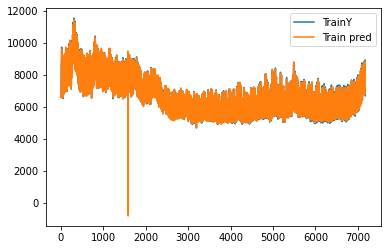

In [ ]:
plt.plot(trainYscaled,label='TrainY')
plt.plot(train_pred_future,label='Train pred')
plt.legend()